# Faster than light travel

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lookbusy1344/Relativity/blob/main/Python/FTL%20Travel.ipynb)

FTL travel is impossible according to our current understanding of physics. Some highly speculative theories propose mechanisms for FTL travel, such as wormholes or warp drives, but these remain purely theoretical and unproven. eg:

https://en.wikipedia.org/wiki/Alcubierre_drive

Although the original paper required **billions of universe masses of negative energy**, more recent work has reduced this to a few solar masses, it is still impossible with any known science.

One persistent problem with **any** type of FTL travel (or communication) is the violation of causality, which can lead to paradoxes such as the "grandfather paradox." This is a fundamental issue with Relativity and leads to the following choice:

- Relativity
- Causality
- FTL travel

Pick any two.

Relativity is very well tested, and causality is a foundational principle of physics, so FTL travel is generally considered impossible.

## How does FTL travel violate causality?

FTL would mean travel into the past is possible.

This stems from the relativity of simultaneity in Special Relativity. Events that are simultaneous in one frame of reference may not be simultaneous in another frame moving relative to the first. If FTL travel were possible, it would allow information or objects to travel back in time in some frames of reference, leading to causality violations. Here is a detailed example:

1. We use our warp drive to travel 4.2 light years to Proxima, instantaneously in our frame of reference.
2. We now accelerate to 0.99c.
3. In our new boosted frame, we warp back to Earth instantaneously.
4. We arrive back on Earth years before we left!

These paradoxes are explored in the `ftl_lib.py` library.

First lets build a Minkowski diagram to visualise the time travelling mission:

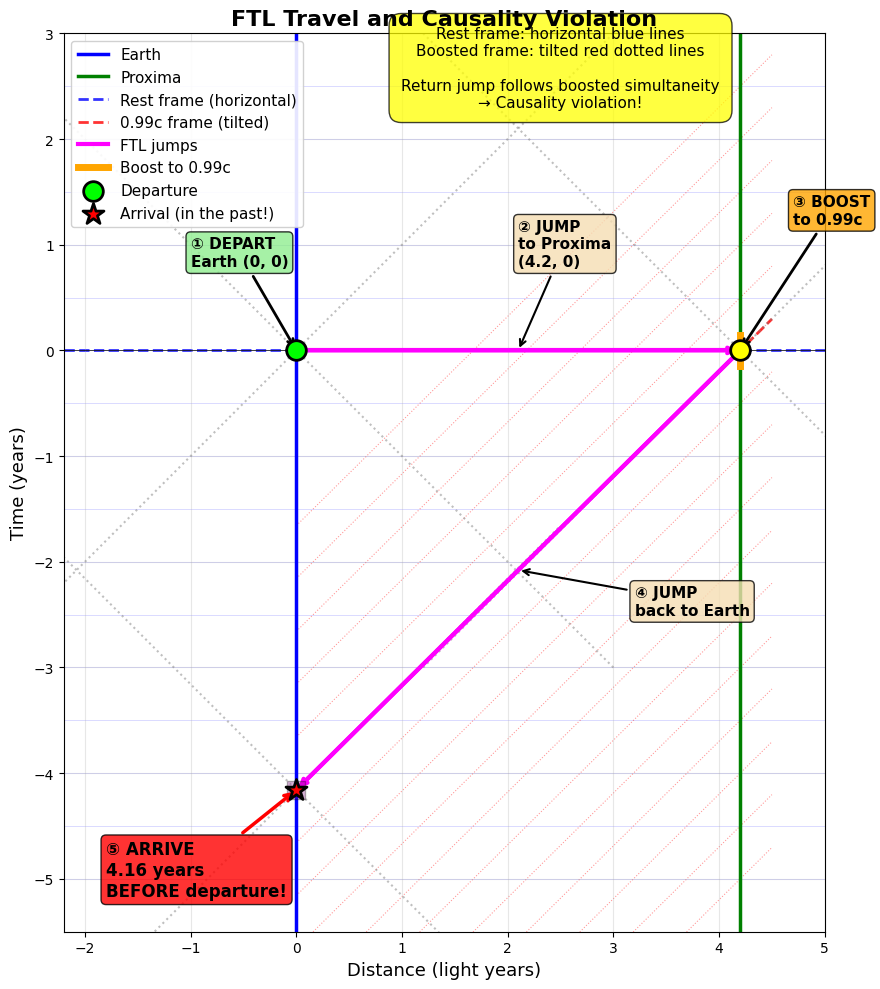


Minkowski diagram shows how FTL travel leads to time travel:
  ① Depart from Earth at t=0
  ② Jump to Proxima (4.2 ly) instantaneously in rest frame
  ③ Accelerate to 0.99c, changing reference frame
  ④ Jump back to Earth instantaneously in boosted frame
  ⑤ Arrive 4.158 years BEFORE departure!

The return jump follows the tilted red line (boosted simultaneity),
which intersects Earth's worldline in the past. Causality violated!


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
distance = 4.2  # light years to Proxima
v = 0.99  # boost velocity as fraction of c
theta = np.arctan(v)  # angle for boosted simultaneity
time_shift = -v * distance  # simultaneity shift ≈ -4.158 years

# Create the comprehensive diagram
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_xlabel("Distance (light years)", fontsize=13)
ax.set_ylabel("Time (years)", fontsize=13)
ax.set_title("FTL Travel and Causality Violation", fontsize=16, fontweight="bold")
ax.grid(True, alpha=0.3)
ax.set_aspect("equal")
ax.axhline(y=0, color="k", linewidth=0.5)
ax.axvline(x=0, color="k", linewidth=0.5)

# Draw Earth and Proxima worldlines
ax.axvline(x=0, color="blue", linewidth=2.5, label="Earth", zorder=2)
ax.axvline(x=distance, color="green", linewidth=2.5, label="Proxima", zorder=2)

# Draw rest frame horizontal grid lines
for t_val in np.arange(-5, 3, 0.5):
    ax.axhline(y=t_val, color="blue", linestyle="-", linewidth=0.5, alpha=0.2, zorder=0)

# Draw one prominent rest frame simultaneity line
ax.axhline(
    y=0,
    color="blue",
    linestyle="--",
    linewidth=2,
    label="Rest frame (horizontal)",
    alpha=0.8,
    zorder=1,
)

# Draw boosted frame coordinate grid (dotted tilted lines)
for t_offset in np.arange(-5, 3, 0.5):
    x_vals = np.array([0, 4.5])
    t_vals = t_offset + np.tan(theta) * (x_vals - distance)
    ax.plot(
        x_vals,
        t_vals,
        color="red",
        linestyle=":",
        linewidth=0.8,
        alpha=0.4,
        zorder=0,
    )

# Draw one prominent boosted simultaneity line through the event
x_vals = np.array([0, 4.5])
t_vals = 0 + np.tan(theta) * (x_vals - distance)
ax.plot(
    x_vals,
    t_vals,
    color="red",
    linestyle="--",
    linewidth=2,
    label="0.99c frame (tilted)",
    alpha=0.8,
    zorder=1,
)


# Light cones at key events
def draw_light_cone(x_event, t_event, extent=2.5):
    x_range = np.array([x_event - extent, x_event + extent])
    ax.plot(
        x_range,
        t_event + (x_range - x_event),
        "gray",
        linestyle=":",
        linewidth=1.5,
        alpha=0.5,
    )
    ax.plot(
        x_range,
        t_event - (x_range - x_event),
        "gray",
        linestyle=":",
        linewidth=1.5,
        alpha=0.5,
    )


draw_light_cone(0, 0, extent=3.0)
draw_light_cone(distance, 0, extent=3.0)
draw_light_cone(0, time_shift, extent=2.5)

# STAGE 1: Initial FTL jump to Proxima
ax.annotate(
    "",
    xy=(distance, 0),
    xytext=(0, 0),
    arrowprops=dict(arrowstyle="->", color="magenta", lw=3),
)
ax.plot([0, distance], [0, 0], "magenta", linewidth=3, label="FTL jumps", zorder=3)

# STAGE 2: Traveler at Proxima (boost marker)
ax.plot(
    [distance, distance],
    [-0.15, 0.15],
    "orange",
    linewidth=5,
    zorder=3,
    label="Boost to 0.99c",
)

# STAGE 3: Return FTL jump along boosted simultaneity
ax.annotate(
    "",
    xy=(0, time_shift),
    xytext=(distance, 0),
    arrowprops=dict(arrowstyle="->", color="magenta", lw=3),
)
ax.plot([distance, 0], [0, time_shift], "magenta", linewidth=3, zorder=3)

# Event markers
ax.scatter(
    [0],
    [0],
    s=200,
    c="lime",
    marker="o",
    zorder=4,
    edgecolors="black",
    linewidths=2,
    label="Departure",
)
ax.scatter(
    [distance],
    [0],
    s=200,
    c="yellow",
    marker="o",
    zorder=4,
    edgecolors="black",
    linewidths=2,
)
ax.scatter(
    [0],
    [time_shift],
    s=250,
    c="red",
    marker="*",
    zorder=4,
    edgecolors="black",
    linewidths=2,
    label="Arrival (in the past!)",
)

# Mark where boosted simultaneity intersects Earth
ax.scatter(
    [0],
    [time_shift],
    s=180,
    c="purple",
    marker="s",
    zorder=3,
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
)

# Annotations
ax.annotate(
    "① DEPART\nEarth (0, 0)",
    xy=(0, 0),
    xytext=(-1.0, 0.8),
    fontsize=11,
    fontweight="bold",
    bbox=dict(boxstyle="round", facecolor="lightgreen", alpha=0.8),
    arrowprops=dict(arrowstyle="->", lw=2),
)

ax.annotate(
    "② JUMP\nto Proxima\n(4.2, 0)",
    xy=(2.1, 0),
    xytext=(2.1, 0.8),
    fontsize=11,
    fontweight="bold",
    bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8),
    arrowprops=dict(arrowstyle="->", lw=1.5),
)

ax.annotate(
    "③ BOOST\nto 0.99c",
    xy=(distance, 0),
    xytext=(distance + 0.5, 1.2),
    fontsize=11,
    fontweight="bold",
    bbox=dict(boxstyle="round", facecolor="orange", alpha=0.8),
    arrowprops=dict(arrowstyle="->", lw=2),
)

ax.annotate(
    "④ JUMP\nback to Earth",
    xy=(2.1, time_shift / 2),
    xytext=(3.2, -2.5),
    fontsize=11,
    fontweight="bold",
    bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8),
    arrowprops=dict(arrowstyle="->", lw=1.5),
)

ax.annotate(
    f"⑤ ARRIVE\n{abs(time_shift):.2f} years\nBEFORE departure!",
    xy=(0, time_shift),
    xytext=(-1.8, time_shift - 1.0),
    fontsize=12,
    fontweight="bold",
    bbox=dict(boxstyle="round", facecolor="red", alpha=0.8),
    arrowprops=dict(arrowstyle="->", lw=2.5, color="red"),
)

# Explanatory text
ax.text(
    2.5,
    2.3,
    "Rest frame: horizontal blue lines\nBoosted frame: tilted red dotted lines\n\nReturn jump follows boosted simultaneity\n→ Causality violation!",
    fontsize=11,
    ha="center",
    bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.75, pad=0.8),
)

ax.set_xlim(-2.2, 5)
ax.set_ylim(-5.5, 3)
ax.legend(loc="upper left", fontsize=11, framealpha=0.9)
plt.tight_layout()
plt.show()

print(f"\nMinkowski diagram shows how FTL travel leads to time travel:")
print(f"  ① Depart from Earth at t=0")
print(f"  ② Jump to Proxima (4.2 ly) instantaneously in rest frame")
print(f"  ③ Accelerate to 0.99c, changing reference frame")
print(f"  ④ Jump back to Earth instantaneously in boosted frame")
print(f"  ⑤ Arrive {abs(time_shift):.3f} years BEFORE departure!")
print(f"\nThe return jump follows the tilted red line (boosted simultaneity),")
print(f"which intersects Earth's worldline in the past. Causality violated!")

In [8]:
# Download ftl_lib.py from your GitHub repo if not present. Important for colab.
import os

if not os.path.exists("ftl_lib.py"):
    !wget -q https://raw.githubusercontent.com/lookbusy1344/Relativity/main/Python/ftl_lib.py

import ftl_lib

# Model the Proxima Centauri scenario from the markdown above
# 4.2 light years, instantaneous warp, boost to 0.99c
distance = 4.2  # light years
boost_speed = 0.99  # as fraction of c

result = ftl_lib.calculate_time_travel(
    distance_ly=distance,
    boost_speed_c=boost_speed,
    outbound_warp_time_years=0.0,  # instantaneous warp
    return_warp_time_years=0.0,  # instantaneous warp back
)

print(f"FTL Journey to Proxima Centauri ({distance} light years)")
print(f"Boost speed: {boost_speed}c")
print(f"\nResults:")
print(f"  Simultaneity shift: {result['simultaneity_shift']:.3f} years")
print(f"  Earth time elapsed: {result['earth_time_elapsed']:.3f} years")
print(f"  Traveler time: {result['traveler_time_elapsed']:.3f} years")
print(f"  Net time displacement: {result['time_displacement']:.3f} years")

if result["time_displacement"] < 0:
    print(
        f"\n🚨 You arrive {abs(result['time_displacement']):.3f} years BEFORE you left!"
    )
else:
    print(f"\n✓ You arrive {result['time_displacement']:.3f} years after you left.")

FTL Journey to Proxima Centauri (4.2 light years)
Boost speed: 0.99c

Results:
  Simultaneity shift: 4.158 years
  Earth time elapsed: 0.000 years
  Traveler time: 0.000 years
  Net time displacement: -4.158 years

🚨 You arrive 4.158 years BEFORE you left!


## The ultimate stealth technology

FTL would provide the traveler with the ultimate stealth technology. If someone spotted you, you could simply use your FTL drive to travel a few minutes back in time, avoiding detection entirely!

Lets work out the math:

In [9]:
distance = 5.0 / (60.0 * 24.0 * 365.25)  # 5 light minutes in light years
boost_speed = 0.99  # as fraction of c


def years_to_minutes(years: float) -> float:
    return years * 365.25 * 24.0 * 60.0


result = ftl_lib.calculate_time_travel(
    distance_ly=distance,
    boost_speed_c=boost_speed,
    outbound_warp_time_years=0.0,  # instantaneous warp
    return_warp_time_years=0.0,  # instantaneous warp back
)

print(
    f"\nFTL Journey to 5 light minutes away, 89,937,737 km. Mars is on average 12.5 light minutes away."
)
print(f"Boost speed: {boost_speed}c")
if result["time_displacement"] < 0:
    print(
        f"\n🚨 You arrive home {abs(years_to_minutes(result['time_displacement'])):.2f} minutes BEFORE you left!"
    )
else:
    print(
        f"\n✓ You arrive home {years_to_minutes(result['time_displacement']):.2f} minutes after you left."
    )


FTL Journey to 5 light minutes away, 89,937,737 km. Mars is on average 12.5 light minutes away.
Boost speed: 0.99c

🚨 You arrive home 4.95 minutes BEFORE you left!


Great! If anyone spots your secret FTL ship, you can simply jump 5 light minutes back in time to avoid detection!! Talk about the ultimate superpower.

## But doesn't the warp bubble mean causality is preserved?

No. The fact that nothing inside the bubble moves faster than light does not mean causality is preserved. The mainstream view in relativity is that **any** spacetime configuration enabling superluminal travel will violate causality, even if locally everything obeys c.

### Why the Alcubierre drive seems causal

Inside the warp bubble, the ship is just “floating” in a region of flat spacetime. Locally:

- The ship is at rest relative to its bubble
- No object or signal inside the bubble exceeds c
- The bubble itself is a distortion of spacetime, not an object moving through spacetime

This is why people say “it doesn’t violate relativity” — and that part is true **locally**.

This is also reflected in the Alcubierre metric description.

### But globally, the bubble does violate causality

The key is that the bubble itself moves faster than light relative to the rest of the universe. And relativity cares about global structure, not just local motion.
The crucial point is:

- Anything that moves from one spacetime point to another faster than light
- Can be seen in some reference frames as moving backwards in time
- Which allows closed timelike curves (time loops)
- Which violates causality

This is the same reason why tachyons or wormholes can create time machines. Even though the ship never breaks the speed of light locally, the warp bubble’s worldline is superluminal, and that’s enough to break causality.

## But what about cosmic expansion?

This is a great comparison. The universe expands faster than light at large scales, so why doesn’t that break causality?

Because:

- Cosmic expansion isn’t motion through space
- It’s a change in the metric itself
- There’s no way to use expansion to send a signal or object faster than light
- No observer sees a signal arriving before it was sent

As one commenter put it: “Space itself isn’t moving through space”.
The expansion rate isn’t a velocity; it’s a rate of change of distance per unit distance.

Warp bubbles, however, can be arranged to send information from A to B faster than light, and therefore backwards in time in some frames.

## Conclusion

Even though nothing inside the bubble exceeds c, the bubble itself can create superluminal connections between spacetime points. And in relativity, superluminal connections inevitably allow causality violations.
So the Alcubierre drive:

- Obeys relativity locally
- Violates causality globally
- Requires exotic matter that may not exist
- Might be forbidden by quantum gravity anyway

Further reading:

https://en.wikipedia.org/wiki/Relativity_of_simultaneity

https://physics.stackexchange.com/questions/705208/why-does-an-alcubierre-drive-travelling-ftl-violate-causality-if-the-universe

https://physics.stackexchange.com/questions/119522/how-does-warp-drive-not-violate-special-relativity-causality-constraints

https://physics.stackexchange.com/questions/52249/how-does-faster-than-light-travel-violate-causality
